In [32]:
import pandas as pd
import os
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import climetlab as cml
import cfgrib


In [33]:
data_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/'
fcn_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/fourcastnet/init20220101-lead48-t00-fcn'
pangu_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/pangu/init20220101-lead48-t00-pangu'

In [34]:
def extract_temp_level500_new(dataset):
    ds = cfgrib.open_datasets(dataset)
    ds_temp = next(var for var in ds if 't' in var.data_vars)['t']
    ds_temp_500 = ds_temp.sel(isobaricInhPa='500')
    return ds_temp_500

In [35]:
pangu0 = f"{pangu_dir}/out-pangu-0.grib"
fcn0 = f"{fcn_dir}/out-fcn-0.grib"

In [36]:
pangu_df = extract_temp_level500_new(pangu0)
for i in range(6, 50, 6):
    pangu_df_temp = extract_temp_level500_new(f"{pangu_dir}/out-pangu-{i}.grib")
    pangu_df = xr.concat([pangu_df, pangu_df_temp], dim="step")
    del pangu_df_temp
pangu_df
pangu_df.to_netcdf(f"{pangu_dir}/out-pangu-all.nc")

In [37]:
fcn_df = extract_temp_level500_new(fcn0)
for i in range(6, 50, 6):
    fcn_df_temp = extract_temp_level500_new(f"{fcn_dir}/out-FCN-{i}.grib")
    fcn_df = xr.concat([fcn_df, fcn_df_temp], dim="step")
    del fcn_df_temp
fcn_df
fcn_df.to_netcdf(f"{fcn_dir}/out-FCN-all.nc")

In [38]:
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0
era5_12 = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/my_graphcast_dir/data/gcp_data/dataset_source-era5_date-2022-01-01_res-0.25_levels-13_steps-12.nc'


In [39]:
# read nc file to xarray
ds_era5 = xr.open_dataset(era5_12)
ds_era5_temp_level500 = ds_era5['temperature'].sel(level=500)
ds_era5_temp_level500

<xarray.DataArray 'temperature' (batch: 1, time: 14, lat: 721, lon: 1440)> Size: 58MB
[14535360 values with dtype=float32]
Coordinates:
  * lon       (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time      (time) timedelta64[ns] 112B 0 days 00:00:00 ... 3 days 06:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 112B ...
Dimensions without coordinates: batch

In [40]:
# drop the elements that have a time greater than 151200000000000. keep in mind that time is in timedelta format so needs to be compare accordingly
ds_era5_temp_level500 = ds_era5_temp_level500.where(ds_era5_temp_level500.time < np.timedelta64(194400000000000, 'ns'), drop=True)
ds_era5_temp_level500


<xarray.DataArray 'temperature' (batch: 1, time: 9, lat: 721, lon: 1440)> Size: 37MB
array([[[[235.36021, 235.36021, 235.36021, ..., 235.36021, 235.36021,
          235.36021],
         [235.69865, 235.69945, 235.69945, ..., 235.69627, 235.69707,
          235.69707],
         [235.96909, 235.96988, 235.97067, ..., 235.96672, 235.96829,
          235.96909],
         ...,
         [233.70992, 233.71228, 233.71466, ..., 233.702  , 233.70438,
          233.70753],
         [233.87439, 233.87518, 233.87675, ..., 233.86964, 233.87123,
          233.87201],
         [234.09975, 234.09975, 234.09975, ..., 234.09975, 234.09975,
          234.09975]],

        [[236.1383 , 236.1383 , 236.1383 , ..., 236.1383 , 236.1383 ,
          236.1383 ],
         [236.33679, 236.33679, 236.33679, ..., 236.33679, 236.33679,
          236.33679],
         [236.44116, 236.44116, 236.44116, ..., 236.44116, 236.44116,
          236.44116],
...
         [234.75603, 234.7553 , 234.75456, ..., 234.75896, 234.75822,
          234.75749],
         [234.74286, 234.74286, 234.7414 , ..., 234.74431, 234.74359,
          234.74359],
         [234.73846, 234.73846, 234.73846, ..., 234.73846, 234.73846,
          234.73846]],

        [[237.81917, 237.81917, 237.81917, ..., 237.81917, 237.81917,
          237.81917],
         [237.86804, 237.86804, 237.86877, ..., 237.86584, 237.86658,
          237.86658],
         [237.99934, 238.00081, 238.00153, ..., 237.99643, 237.99788,
          237.99861],
         ...,
         [232.92435, 232.92216, 232.9207 , ..., 232.93092, 232.92946,
          232.92654],
         [232.99   , 232.98854, 232.98782, ..., 232.99365, 232.99292,
          232.99147],
         [233.0739 , 233.0739 , 233.0739 , ..., 233.0739 , 233.0739 ,
          233.0739 ]]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time      (time) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 72B ...
Dimensions without coordinates: batch

In [41]:
# get the data for bounds over India
indian_region_pangu = pangu_df.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

indian_region_pangu

<xarray.DataArray 't' (step: 9, latitude: 117, longitude: 117)> Size: 493kB
array([[[251.71304, 251.96695, 252.25406, ..., 249.85855, 249.77945,
         249.673  ],
        [251.84488, 252.02164, 252.27457, ..., 249.99039, 249.94449,
         249.85172],
        [252.01382, 252.11441, 252.2687 , ..., 250.03824, 250.02261,
         249.95328],
        ...,
        [266.60757, 266.62418, 266.64175, ..., 267.57437, 267.62906,
         267.67984],
        [266.64468, 266.6691 , 266.69156, ..., 267.5607 , 267.64468,
         267.72574],
        [266.69254, 266.7189 , 266.74722, ..., 267.54898, 267.65152,
         267.75504]],

       [[250.47656, 250.58594, 250.70117, ..., 249.51953, 249.52246,
         249.60254],
        [250.6416 , 250.73242, 250.84082, ..., 249.62598, 249.61328,
         249.65137],
        [250.78809, 250.87598, 250.95117, ..., 249.71973, 249.69922,
         249.69824],
...
        [267.39746, 267.38672, 267.3789 , ..., 267.72168, 267.73438,
         267.77344],
        [267.43262, 267.4209 , 267.41016, ..., 267.74902, 267.76367,
         267.81152],
        [267.50586, 267.4961 , 267.4912 , ..., 267.78906, 267.83203,
         267.8457 ]],

       [[253.0217 , 252.92014, 252.7883 , ..., 250.06564, 250.07443,
         250.25705],
        [253.26584, 253.16525, 253.05002, ..., 250.31857, 250.31369,
         250.51096],
        [253.53244, 253.43283, 253.3215 , ..., 250.54514, 250.54318,
         250.75705],
        ...,
        [267.01584, 267.0256 , 267.03537, ..., 267.7678 , 267.80783,
         267.89084],
        [267.0168 , 267.0295 , 267.03928, ..., 267.87228, 267.91428,
         267.98654],
        [267.01974, 267.02365, 267.02463, ..., 268.02658, 268.0764 ,
         268.11838]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:0...
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 936B 37.0 36.75 36.5 ... 8.5 8.25 8.0
  * longitude      (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    valid_time     (step) datetime64[ns] 72B 2022-01-01 ... 2022-01-03
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [42]:
# get the data for bounds over India
indian_region_era5 = ds_era5_temp_level500.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)
indian_region_era5

<xarray.DataArray 'temperature' (batch: 1, time: 9, lat: 117, lon: 117)> Size: 493kB
array([[[[266.69214, 266.71902, 266.7475 , ..., 267.54932, 267.65134,
          267.7549 ],
         [266.6447 , 266.66922, 266.69138, ..., 267.5604 , 267.64502,
          267.72568],
         [266.60754, 266.62415, 266.64154, ..., 267.57465, 267.62918,
          267.6798 ],
         ...,
         [252.01343, 252.11465, 252.26884, ..., 250.03813, 250.02232,
          249.95352],
         [251.845  , 252.02135, 252.27438, ..., 249.99069, 249.94482,
          249.85152],
         [251.71295, 251.96678, 252.25383, ..., 249.85864, 249.77956,
          249.6728 ]],

        [[266.96735, 267.04086, 267.13736, ..., 267.4932 , 267.5501 ,
          267.65134],
         [266.912  , 266.94916, 267.02347, ..., 267.494  , 267.60706,
          267.74228],
         [266.9096 , 266.90723, 266.93097, ..., 267.49792, 267.63474,
          267.77707],
...
         [252.53973, 252.3604 , 252.17155, ..., 252.427  , 252.50752,
          252.53827],
         [252.10641, 252.01126, 251.88316, ..., 252.06468, 252.09396,
          252.12251],
         [251.7236 , 251.68114, 251.64088, ..., 251.65479, 251.67894,
          251.74483]],

        [[266.65988, 266.67084, 266.67227, ..., 267.61987, 267.6899 ,
          267.8161 ],
         [266.67227, 266.6774 , 266.66864, ..., 267.48566, 267.59436,
          267.75336],
         [266.70438, 266.7029 , 266.68616, ..., 267.41855, 267.5564 ,
          267.71545],
         ...,
         [254.67963, 254.58917, 254.48851, ..., 250.74846, 250.73022,
          250.70543],
         [254.30687, 254.20692, 254.10115, ..., 250.39029, 250.38081,
          250.39249],
         [254.04353, 253.95671, 253.8699 , ..., 250.11746, 250.16196,
          250.23273]]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 468B 68.0 68.25 68.5 68.75 ... 96.25 96.5 96.75 97.0
  * lat       (lat) float32 468B 8.0 8.25 8.5 8.75 9.0 ... 36.25 36.5 36.75 37.0
  * time      (time) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:00:00
    level     int32 4B 500
    datetime  (batch, time) datetime64[ns] 72B ...
Dimensions without coordinates: batch

In [43]:
forecast_flipped = indian_region_pangu.sel(latitude=indian_region_pangu.latitude[::-1])
forecast_flipped = forecast_flipped.rename({'latitude': 'lat', 'longitude': 'lon'})


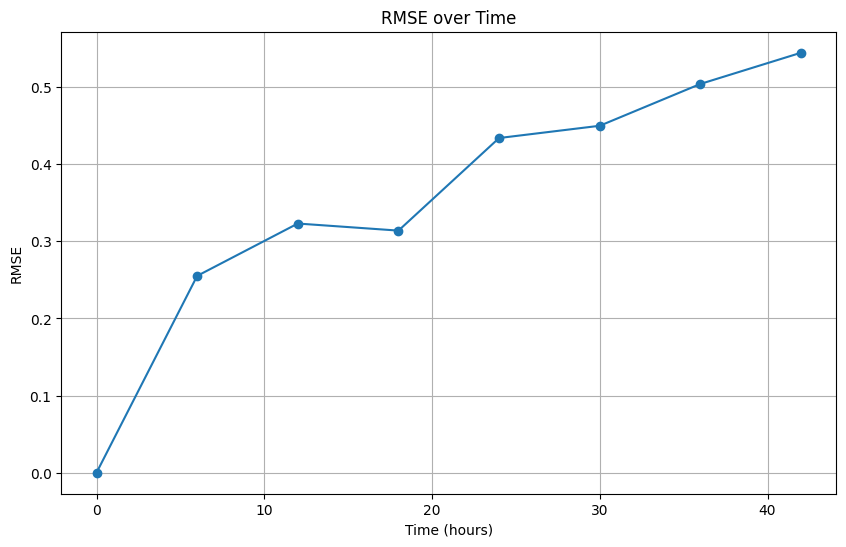

In [49]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt

# List to store RMSE values
rmse_values = []
time_steps = []

for i in range(0, 172800000000000, 21600000000000):
    forecast_step = forecast_flipped.sel(step=f'{i}')
    india_era5_step = indian_region_era5.sel(time=f'{i}')
    diff = india_era5_step - forecast_step
    
    # Calculate RMSE for the current time step
    rmse = np.sqrt(np.mean(diff**2))
    rmse_values.append(rmse)
    time_steps.append(i / 36e11)  # Convert time step to hours or desired unit
    
    # Plot the difference
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"Difference at step {i/36e11}")
    plt.savefig(f"pangu_diff_plot_step_{i/36e11}.png")
    plt.close()

# Plot RMSE over time
plt.figure(figsize=(10, 6))
plt.plot(time_steps, rmse_values, marker='o')
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('RMSE over Time')
plt.grid(True)
plt.show()

# save the rmse data
rmse_df = pd.DataFrame({"time": time_steps, "rmse": rmse_values})
rmse_df.to_csv("rmse_data_pangu.csv", index=False)

In [50]:
# get the data for bounds over India
indian_region_fcn = fcn_df.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)

indian_region_fcn

<xarray.DataArray 't' (step: 9, latitude: 117, longitude: 117)> Size: 493kB
array([[[251.71304, 251.96695, 252.25406, ..., 249.85855, 249.77945,
         249.673  ],
        [251.84488, 252.02164, 252.27457, ..., 249.99039, 249.94449,
         249.85172],
        [252.01382, 252.11441, 252.2687 , ..., 250.03824, 250.02261,
         249.95328],
        ...,
        [266.60757, 266.62418, 266.64175, ..., 267.57437, 267.62906,
         267.67984],
        [266.64468, 266.6691 , 266.69156, ..., 267.5607 , 267.64468,
         267.72574],
        [266.69254, 266.7189 , 266.74722, ..., 267.54898, 267.65152,
         267.75504]],

       [[250.68912, 250.84146, 250.9313 , ..., 249.51236, 249.48404,
         249.5104 ],
        [250.91959, 250.98697, 251.08658, ..., 249.71451, 249.6774 ,
         249.6774 ],
        [251.03384, 251.1774 , 251.25064, ..., 249.90298, 249.85611,
         249.86295],
...
        [266.95868, 266.92743, 266.91766, ..., 267.61298, 267.54364,
         267.5368 ],
        [266.97333, 266.9245 , 266.86395, ..., 267.5661 , 267.56512,
         267.528  ],
        [266.86786, 266.84637, 266.82782, ..., 267.7038 , 267.7204 ,
         267.71063]],

       [[253.53908, 253.459  , 253.417  , ..., 250.32228, 250.36525,
         250.37013],
        [253.8545 , 253.78127, 253.70802, ..., 250.5508 , 250.58986,
         250.63673],
        [254.17482, 254.0713 , 253.98634, ..., 250.8008 , 250.80763,
         250.80177],
        ...,
        [266.4756 , 266.46777, 266.47363, ..., 267.7246 , 267.70605,
         267.70117],
        [266.4746 , 266.4297 , 266.37305, ..., 267.71973, 267.75098,
         267.74023],
        [266.25   , 266.24023, 266.2373 , ..., 267.84082, 267.8672 ,
         267.87305]]], dtype=float32)
Coordinates:
    time           datetime64[ns] 8B 2022-01-01
  * step           (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days 00:0...
    isobaricInhPa  float64 8B 500.0
  * latitude       (latitude) float64 936B 37.0 36.75 36.5 ... 8.5 8.25 8.0
  * longitude      (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    valid_time     (step) datetime64[ns] 72B 2022-01-01 ... 2022-01-03
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

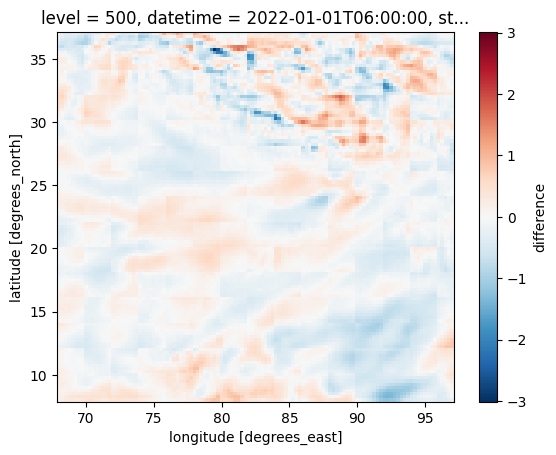

In [51]:
forecast_flipped_fcn = indian_region_fcn.sel(latitude=indian_region_fcn.latitude[::-1])
forecast_flipped_fcn = forecast_flipped_fcn.rename({'latitude': 'lat', 'longitude': 'lon'})


forecast_step1 = forecast_flipped_fcn.sel(step='21600000000000')
india_era5_step1 = indian_region_era5.sel(time='21600000000000')
diff = xr.Dataset({"difference": india_era5_step1 - forecast_step1})
diff.difference.plot()

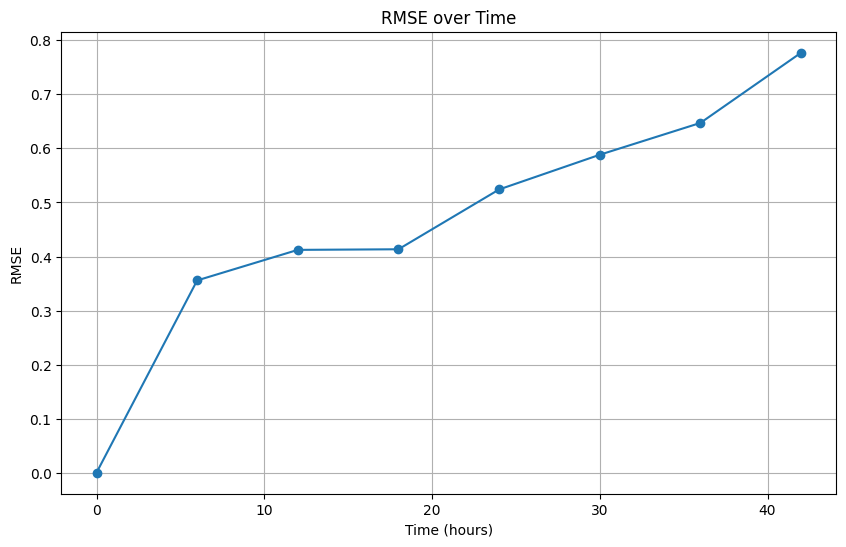

In [58]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt

# List to store RMSE values
rmse_values = []
time_steps = []

for i in range(0, 172800000000000, 21600000000000):
    forecast_step = forecast_flipped_fcn.sel(step=f'{i}')
    india_era5_step = indian_region_era5.sel(time=f'{i}')
    diff = india_era5_step - forecast_step
    
    # Calculate RMSE for the current time step
    rmse = np.sqrt(np.mean(diff**2))
    rmse_values.append(rmse)
    time_steps.append(i / 36e11)  # Convert time step to hours or desired unit
    
    # Plot the difference
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"Difference at step {i/36e11}")
    plt.savefig(f"plots/FCN_diff_plot_step_{i/36e11}.png")
    plt.close()

# Plot RMSE over time
plt.figure(figsize=(10, 6))
plt.plot(time_steps, rmse_values, marker='o')
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('RMSE over Time')
plt.grid(True)
plt.show()

In [ ]:

# save the rmse data as csv. the two columns should be the time step and the absolute rmse value
rmse_df = pd.DataFrame({"time": time_steps, "rmse": rmse_values})
rmse_df.to_csv("rmse_data_fcn.csv", index=False)

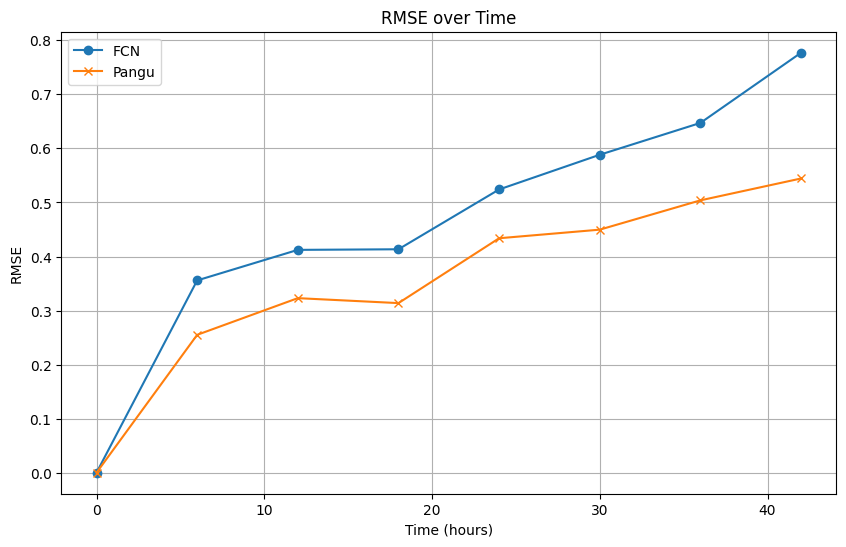

In [61]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lists to store RMSE values
rmse_values_fcn = []
rmse_values_pangu = []
time_steps = []

for i in range(0, 172800000000000, 21600000000000):
    # FCN forecast
    forecast_step_fcn = forecast_flipped_fcn.sel(step=f'{i}')
    india_era5_step = indian_region_era5.sel(time=f'{i}')
    diff_fcn = india_era5_step - forecast_step_fcn
    
    # Calculate RMSE for FCN forecast
    rmse_fcn = np.sqrt(np.mean(diff_fcn**2))
    rmse_values_fcn.append(rmse_fcn)
    
    # Plot the difference for FCN forecast
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff_fcn.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"FCN Difference at step {i/36e11}")
    plt.savefig(f"plots/FCN_diff_plot_step_{i/36e11}.png")
    plt.close()
    
    # Pangu forecast
    forecast_step_pangu = forecast_flipped.sel(step=f'{i}')
    diff_pangu = india_era5_step - forecast_step_pangu
    
    # Calculate RMSE for Pangu forecast
    rmse_pangu = np.sqrt(np.mean(diff_pangu**2))
    rmse_values_pangu.append(rmse_pangu)
    time_steps.append(i / 36e11)  # Convert time step to hours or desired unit
    
    # Plot the difference for Pangu forecast
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, edgecolor='black')
    
    diff_pangu.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6})
    plt.title(f"Pangu Difference at step {i/36e11}")
    plt.savefig(f"plots/Pangu_diff_plot_step_{i/36e11}.png")
    plt.close()

# Plot RMSE over time for both forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_steps, rmse_values_fcn, marker='o', label='FCN')
plt.plot(time_steps, rmse_values_pangu, marker='x', label='Pangu')
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('RMSE over Time')
plt.legend()
plt.grid(True)
plt.show()

# Save the RMSE data
rmse_df = pd.DataFrame({
    "time": time_steps,
    "rmse_fcn": rmse_values_fcn,
    "rmse_pangu": rmse_values_pangu
})
rmse_df.to_csv("rmse_data.csv", index=False)